In [38]:
# Import packages
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in Kaggle dataset
os.chdir('/Users/homanchan/.kaggle/data/')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [23]:
numeric_col = train_data.select_dtypes("number").columns.to_list()
print(numeric_col)

['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


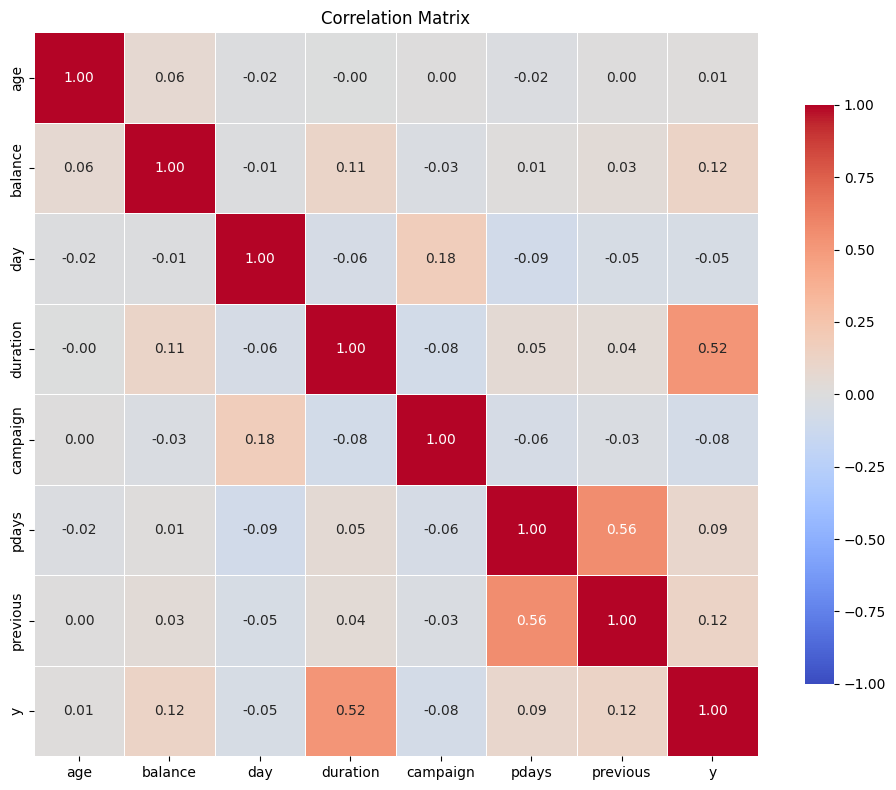

In [ ]:
# Quick glance of correlation matrix before encoding categorical variables

selected_cols = numeric_col.copy()
selected_cols.remove('id')

# Compute the correlation matrix
corr_matrix = train_data[selected_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,         # Show correlation values
            fmt=".2f",          # Format to 2 decimal places
            cmap='coolwarm',    # Color palette
            vmin=-1, vmax=1,    # Set color scale range
            square=True,        # Make cells square
            linewidths=0.5,     # Add lines between cells
            cbar_kws={"shrink": 0.8})  # Shrink color bar

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [28]:
categorical_col = train_data.select_dtypes("object").columns.to_list()
print(categorical_col)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [43]:
train_data.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [48]:
# Step 1: Split features and target
X_train = train_data.drop(['id', 'y'], axis=1)
y_train = train_data['y']
X_test = test_data.drop(['id'], axis=1)

In [51]:
# Initialize encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform
encoder.fit(X_train[categorical_col])
train_encoded = encoder.transform(X_train[categorical_col])
test_encoded = encoder.transform(X_test[categorical_col])

# Convert to DataFrame with feature names
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_col))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_col))

# Concatenate with original
train_encoded_full = pd.concat([X_train.drop(columns=categorical_col), train_encoded_df], axis=1)
test_encoded_full = pd.concat([X_test.drop(columns=categorical_col), test_encoded_df], axis=1)

print(train_encoded_full.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [52]:
# Confirm all categorical variables converted to numeric
train_encoded_full.select_dtypes("object").columns.to_list()

[]

In [55]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(train_encoded_full)

# Step 5: Transform both train and test sets
train_scaled = scaler.transform(train_encoded_full)
test_scaled = scaler.transform(test_encoded_full)

# Optional: Convert back to DataFrame for readability
train_scaled_df = pd.DataFrame(train_scaled, columns=train_encoded_full.columns, index=train_encoded_full.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=test_encoded_full.columns, index=test_encoded_full.index)

print("Standardized Train Set:\n", train_scaled_df)

Standardized Train Set:
              age   balance       day  duration  campaign     pdays  previous  \
0       0.106310 -0.422083  1.076594 -0.510829  0.155597 -0.302803 -0.223475   
1      -0.289776 -0.243316  0.228194 -0.261338 -0.580100 -0.302803 -0.223475   
2      -0.487819 -0.212287 -0.256606 -0.532843 -0.212251 -0.302803 -0.223475   
3      -1.379012 -0.412563  1.440194 -0.903409 -0.212251 -0.302803 -0.223475   
4      -1.478033 -0.111092 -1.589805  2.369319 -0.580100 -0.302803 -0.223475   
...          ...       ...       ...       ...       ...       ...       ...   
749995 -1.180969  0.027479 -1.468605  2.750893 -0.212251 -0.302803 -0.223475   
749996  2.779889 -0.202062  0.349394 -0.620898 -0.580100 -0.302803 -0.223475   
749997  0.898482 -0.348038  0.106994 -0.525505 -0.580100 -0.302803 -0.223475   
749998 -0.883905 -0.521163  1.197794 -0.543849  1.259142 -0.302803 -0.223475   
749999  0.106310  0.125148 -1.468605 -0.415435 -0.580100 -0.276937  5.016340   

        job_ad